In [1]:
!pip install --upgrade -q gspread
!pip install -U matplotlib

    100% |████████████████████████████████| 12.6MB 1.8MB/s 
Requirement not upgraded as not directly required: cycler>=0.10 in /usr/local/lib/python2.7/dist-packages (from matplotlib) (0.10.0)
Requirement not upgraded as not directly required: numpy>=1.7.1 in /usr/local/lib/python2.7/dist-packages (from matplotlib) (1.14.3)
Requirement not upgraded as not directly required: backports.functools-lru-cache in /usr/local/lib/python2.7/dist-packages (from matplotlib) (1.5)
Requirement not upgraded as not directly required: subprocess32 in /usr/local/lib/python2.7/dist-packages (from matplotlib) (3.5.0)
    100% |████████████████████████████████| 952kB 20.6MB/s 
Requirement not upgraded as not directly required: pytz in /usr/local/lib/python2.7/dist-packages (from matplotlib) (2018.4)
Requirement not upgraded as not directly required: six>=1.10 in /usr/local/lib/python2.7/dist-packages (from matplotlib) (1.11.0)
Requirement not upgraded as not directly required: python-dateutil>=2.1 in /usr/

In [0]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [3]:
# Open our new sheet and read some data.
worksheet = gc.open('Uber').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)
df.head()

[[u'trip_id', u'date', u'date_time', u'driver', u'car_type', u'city', u'price', u'payment_method', u'start_time', u'start_address', u'end_time', u'end_address', u'distance', u'trip_time'], [u'7e51cd92-341e-4658-8159-c41ef3563c8e', u'6/1/18', u'Friday, June 1, 2018 9:45 AM', u'Mohan', u'POOL', u'Chennai', u'\xe2\u201a\xb989.53', u'', u'9:45 AM', u'S. No. 181/3B1, Off 60 Feet Road, Nr. Sundaresa Nagar, Porur Gardens, Porur, Chennai, Tamil Nadu 600116, India', u'10:21 AM', u'1/124, DLF IT Park Rd, Ramapuram, DLF IT Park Rd, Ramapuram, Chennai, Tamil Nadu 600116, India', u'5.26', u'0:20:11'], [u'7aea5667-c16d-4701-93f4-bdd3292cff7a', u'5/30/18', u'Wednesday, May 30, 2018 2:43 PMJayanth Tech Park, Nandambakkam, Chennai, Tamil Nadu 600089, India', u'Johnson', u'POOL', u'Chennai', u'', u'', u'2:43 PM', u'Jayanth Tech Park, Nandambakkam, Chennai, Tamil Nadu 600089, India', '', '', '', ''], [u'266dfca1-90d9-4a3c-a279-93e8f7f57aca', u'5/27/18', u'Sunday, May 27, 2018 6:42 PM', u'-', u'AUTO', u'C

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,trip_id,date,date_time,driver,car_type,city,price,payment_method,start_time,start_address,end_time,end_address,distance,trip_time
1,7e51cd92-341e-4658-8159-c41ef3563c8e,6/1/18,"Friday, June 1, 2018 9:45 AM",Mohan,POOL,Chennai,â‚¹89.53,,9:45 AM,"S. No. 181/3B1, Off 60 Feet Road, Nr. Sundares...",10:21 AM,"1/124, DLF IT Park Rd, Ramapuram, DLF IT Park ...",5.26,0:20:11
2,7aea5667-c16d-4701-93f4-bdd3292cff7a,5/30/18,"Wednesday, May 30, 2018 2:43 PMJayanth Tech Pa...",Johnson,POOL,Chennai,,,2:43 PM,"Jayanth Tech Park, Nandambakkam, Chennai, Tami...",,,,
3,266dfca1-90d9-4a3c-a279-93e8f7f57aca,5/27/18,"Sunday, May 27, 2018 6:42 PM",-,AUTO,Chennai,,,6:42 PM,,Dropoff time unknown,"1st Cross Street, Moovendhar Nagar, Sri Krishn...",,
4,7e8f26bc-df31-4991-8f27-3f5e9e5c282e,5/26/18,"Saturday, May 26, 2018 4:13 PM",UberEATS,Uber Eats Marketplace,Chennai,â‚¹74.00,,4:13 PM,,4:58 PM,,2.86,0:45:00


In [0]:
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(0))

In [5]:
df['trip_id'].is_unique

True

In [6]:
df = df.set_index('trip_id')
df.head()

,date,date_time,driver,car_type,city,price,payment_method,start_time,start_address,end_time,end_address,distance,trip_time
trip_id,,,,,,,,,,,,,
7e51cd92-341e-4658-8159-c41ef3563c8e,6/1/18,"Friday, June 1, 2018 9:45 AM",Mohan,POOL,Chennai,â‚¹89.53,,9:45 AM,"S. No. 181/3B1, Off 60 Feet Road, Nr. Sundares...",10:21 AM,"1/124, DLF IT Park Rd, Ramapuram, DLF IT Park ...",5.26,0:20:11
7aea5667-c16d-4701-93f4-bdd3292cff7a,5/30/18,"Wednesday, May 30, 2018 2:43 PMJayanth Tech Pa...",Johnson,POOL,Chennai,,,2:43 PM,"Jayanth Tech Park, Nandambakkam, Chennai, Tami...",,,,
266dfca1-90d9-4a3c-a279-93e8f7f57aca,5/27/18,"Sunday, May 27, 2018 6:42 PM",-,AUTO,Chennai,,,6:42 PM,,Dropoff time unknown,"1st Cross Street, Moovendhar Nagar, Sri Krishn...",,
7e8f26bc-df31-4991-8f27-3f5e9e5c282e,5/26/18,"Saturday, May 26, 2018 4:13 PM",UberEATS,Uber Eats Marketplace,Chennai,â‚¹74.00,,4:13 PM,,4:58 PM,,2.86,0:45:00
7728ac56-5663-4b56-bd1a-446173ac7d39,5/20/18,"Sunday, May 20, 2018 8:41 PM",UberEATS,Uber Eats Marketplace,Chennai,â‚¹270.00,,8:41 PM,,9:10 PM,,3.33,0:28:17


In [0]:
df['price'] = df['price'].str.slice(3)

In [0]:
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

In [9]:
import numpy as np
df['end_time'].replace('', np.nan, inplace=True)
df['end_time'].replace('Dropoff time unknown', np.nan, inplace=True)
df['start_time'].replace('', np.nan, inplace=True)

df.dropna(subset=['end_time'], inplace=True)
df.dropna(subset=['start_time'], inplace=True)
df.dropna(subset=['price'], inplace=True)

df['diff_time'] = (pd.to_datetime(df['end_time'], format='%I:%M %p')) - (pd.to_datetime(df['start_time'], format='%I:%M %p'))
df

,date,date_time,driver,car_type,city,price,payment_method,start_time,start_address,end_time,end_address,distance,trip_time,diff_time
trip_id,,,,,,,,,,,,,,
7e51cd92-341e-4658-8159-c41ef3563c8e,2018-06-01,"Friday, June 1, 2018 9:45 AM",Mohan,POOL,Chennai,89.53,,9:45 AM,"S. No. 181/3B1, Off 60 Feet Road, Nr. Sundares...",10:21 AM,"1/124, DLF IT Park Rd, Ramapuram, DLF IT Park ...",5.26,0:20:11,00:36:00
7e8f26bc-df31-4991-8f27-3f5e9e5c282e,2018-05-26,"Saturday, May 26, 2018 4:13 PM",UberEATS,Uber Eats Marketplace,Chennai,74.00,,4:13 PM,,4:58 PM,,2.86,0:45:00,00:45:00
7728ac56-5663-4b56-bd1a-446173ac7d39,2018-05-20,"Sunday, May 20, 2018 8:41 PM",UberEATS,Uber Eats Marketplace,Chennai,270.00,,8:41 PM,,9:10 PM,,3.33,0:28:17,00:29:00
aaa236e2-e109-4e8c-bfcf-d7bc03388310,2018-05-15,"Tuesday, May 15, 2018 9:20 PM",UberEATS,Uber Eats Marketplace,Chennai,191.50,,9:20 PM,,10:01 PM,,1.29,0:40:54,00:41:00
a806041f-b056-4fd6-8b76-7a91836fbb57,2018-05-11,"Friday, May 11, 2018 10:47 AM",Chandrasekaran,POOL,Chennai,49.53,,10:47 AM,"S. No. 181/3B1, Off 60 Feet Road, Nr. Sundares...",11:11 AM,"10-12, SH 113, Ganesh Nagar, Porur, Chennai, T...",2.06,0:09:30,00:24:00
18fbc880-1171-4a92-83d9-49709d8a0513,2018-05-10,"Thursday, May 10, 2018 7:55 PM",Prasad,POOL,Chennai,79.53,,7:55 PM,DLF SEZ Block 7 DLF SEZ,8:31 PM,"S. No. 181/3B1, Off 60 Feet Road, Nr. Sundares...",2.66,0:24:57,00:36:00
1fc46f05-4025-47cc-9309-a1d368966baf,2018-05-10,"Thursday, May 10, 2018 10:32 AM",Sivakumar,POOL,Chennai,59.53,,10:32 AM,"10-12, SH 113, Ganesh Nagar, Porur, Chennai, T...",10:53 AM,"600089, 1/124, DLF IT Park Rd, Ramapuram, DLF ...",1.92,0:16:03,00:21:00
4f3bf265-3168-48dd-8275-435e720b0bf1,2018-05-03,"Thursday, May 3, 2018 7:31 AM",MANIKANDAN,uberGO,Chennai,224.22,,7:31 AM,Domestic Arrivals Uber Zone (Opp gate 3) Chenn...,8:08 AM,"S. No. 181/3B1, Off 60 Feet Road, Nr. Sundares...",14.24,0:31:58,00:37:00
54932d54-4c0d-4b35-ad63-2afb290d25fc,2018-04-27,"Friday, April 27, 2018 12:55 PM",Bharathi,uberGO,Chennai,251.76,,12:55 PM,"Infinity Flats, Off 60 Feet Road, Adjacent to ...",1:55 PM,"Jutkapuram, Periyamet, Chennai, Tamil Nadu 600...",17.11,0:38:29,01:00:00


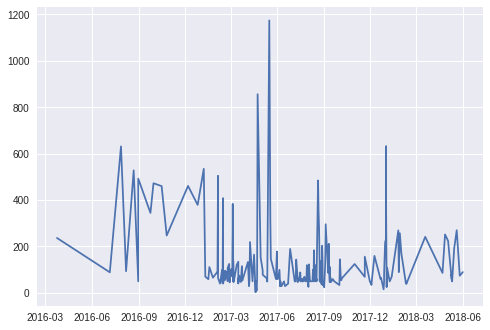

In [10]:
import matplotlib.pyplot as plt
_ = plt.plot(df['date'], df['price'])

In [11]:
df['price'].sum()

26852.03

In [0]:
df['distance'] = pd.to_numeric(df['distance'])

In [56]:
df['diff_time'].sum()

Timedelta('5 days 03:30:00')

In [57]:
(df['price'].sum() / df['diff_time'].sum().total_seconds()) * 60

3.623755735492577

In [58]:
df['distance'].sum()

1838.75

In [59]:
print pd.value_counts(df['car_type'].values, sort=True)

uberGO                   99
POOL                     98
Uber Eats Marketplace     5
UberVIP                   3
uberX                     2
uberXL                    2
uberPOOL                  2
City to Kovalam           1
uberRETURN                1
dtype: int64


In [0]:
df['trip_time'] = pd.to_timedelta(df['trip_time'])
df['trip_time'] = pd.to_timedelta(df['trip_time'])

In [85]:
df['wait_time'] = df['diff_time'] - df['trip_time']
df

,date,date_time,driver,car_type,city,price,payment_method,start_time,start_address,end_time,end_address,distance,trip_time,diff_time,wait_time
trip_id,,,,,,,,,,,,,,,
7e51cd92-341e-4658-8159-c41ef3563c8e,2018-06-01,"Friday, June 1, 2018 9:45 AM",Mohan,POOL,Chennai,89.53,,9:45 AM,"S. No. 181/3B1, Off 60 Feet Road, Nr. Sundares...",10:21 AM,"1/124, DLF IT Park Rd, Ramapuram, DLF IT Park ...",5.26,00:20:11,00:36:00,00:15:49
7e8f26bc-df31-4991-8f27-3f5e9e5c282e,2018-05-26,"Saturday, May 26, 2018 4:13 PM",UberEATS,Uber Eats Marketplace,Chennai,74.00,,4:13 PM,,4:58 PM,,2.86,00:45:00,00:45:00,00:00:00
7728ac56-5663-4b56-bd1a-446173ac7d39,2018-05-20,"Sunday, May 20, 2018 8:41 PM",UberEATS,Uber Eats Marketplace,Chennai,270.00,,8:41 PM,,9:10 PM,,3.33,00:28:17,00:29:00,00:00:43
aaa236e2-e109-4e8c-bfcf-d7bc03388310,2018-05-15,"Tuesday, May 15, 2018 9:20 PM",UberEATS,Uber Eats Marketplace,Chennai,191.50,,9:20 PM,,10:01 PM,,1.29,00:40:54,00:41:00,00:00:06
a806041f-b056-4fd6-8b76-7a91836fbb57,2018-05-11,"Friday, May 11, 2018 10:47 AM",Chandrasekaran,POOL,Chennai,49.53,,10:47 AM,"S. No. 181/3B1, Off 60 Feet Road, Nr. Sundares...",11:11 AM,"10-12, SH 113, Ganesh Nagar, Porur, Chennai, T...",2.06,00:09:30,00:24:00,00:14:30
18fbc880-1171-4a92-83d9-49709d8a0513,2018-05-10,"Thursday, May 10, 2018 7:55 PM",Prasad,POOL,Chennai,79.53,,7:55 PM,DLF SEZ Block 7 DLF SEZ,8:31 PM,"S. No. 181/3B1, Off 60 Feet Road, Nr. Sundares...",2.66,00:24:57,00:36:00,00:11:03
1fc46f05-4025-47cc-9309-a1d368966baf,2018-05-10,"Thursday, May 10, 2018 10:32 AM",Sivakumar,POOL,Chennai,59.53,,10:32 AM,"10-12, SH 113, Ganesh Nagar, Porur, Chennai, T...",10:53 AM,"600089, 1/124, DLF IT Park Rd, Ramapuram, DLF ...",1.92,00:16:03,00:21:00,00:04:57
4f3bf265-3168-48dd-8275-435e720b0bf1,2018-05-03,"Thursday, May 3, 2018 7:31 AM",MANIKANDAN,uberGO,Chennai,224.22,,7:31 AM,Domestic Arrivals Uber Zone (Opp gate 3) Chenn...,8:08 AM,"S. No. 181/3B1, Off 60 Feet Road, Nr. Sundares...",14.24,00:31:58,00:37:00,00:05:02
54932d54-4c0d-4b35-ad63-2afb290d25fc,2018-04-27,"Friday, April 27, 2018 12:55 PM",Bharathi,uberGO,Chennai,251.76,,12:55 PM,"Infinity Flats, Off 60 Feet Road, Adjacent to ...",1:55 PM,"Jutkapuram, Periyamet, Chennai, Tamil Nadu 600...",17.11,00:38:29,01:00:00,00:21:31


In [0]:
df_pool = df.loc[df['car_type'] == 'POOL']
df_ubergo = df.loc[df['car_type'] == 'uberGO']

In [87]:
df_pool['price'].sum() / df_pool['distance'].sum()

12.095041615016822

In [88]:
df_ubergo['price'].sum() / df_ubergo['distance'].sum()

14.363187673046825